# **Objectif du CP0**
*Comme vous le savez, il s'agit d'un cours avancé et nous supposons une connaissance de base du ML.*

Lors de votre tout premier point de contrôle, vous allez : 

1.   Importez l' ensemble de données cardiaques , nettoyez-le et effectuez une analyse et une visualisation initiales ;
2.   Créer un modèle d'apprentissage automatique ;
3.   Test de modèle (courbe Roc, matrice de confusion et précision du test).

# **IMPORTATION DES LIBRAIRIES**

In [97]:
#Telechargement des bases de donnees
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#EDA
from collections import Counter
import pandas_profiling as pp

# Pretraitement des donnees
from sklearn.preprocessing import StandardScaler

# Scission des donnees
from sklearn.model_selection import train_test_split

# modelisation des donnees
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#**1- Importation des données et nettoyage**

**1.1 Importation**

In [17]:
data = pd.read_csv('../content/sample_data/heart.csv', sep=',')
print('data', data.shape)
data.head()

data (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **OBJECTIF DE L'ETUDE**
*Cette base de données donne des informations relatives aux maladies cardiaques. Elle contient 13 colonnes, la cible (**Target**) est affectée par les 12 autres colonnes. **L'objectif est de classer chaque individu malade - non malade, suivant les 12 autres variables à l'aide de différents algorithmes d'apprentissage automatique et de déterminer quel algorithme convient à ce jeu de données**.*

# **DESCRIPTION DES VARIABLES**

1. **Âge** (âge en années)
2. **Sexe** (1 = homme ; 0 = femme)
3. **CP** (type de douleur thoracique)
4. **TRESTBPS** (pression artérielle au repos (en mm Hg à l'admission à l'hôpital))
5. **CHOL** (cholestérol sérique en mg/dl)
6. **FPS** (glycémie à jeun > 120 mg/dl) (1 = vrai ; 0 = faux)
7. **RESTECH** (résultats électrocardiographiques au repos)
8. **THALACH** (fréquence cardiaque maximale atteinte)
9. **EXANG** (angine de poitrine induite par l'exercice (1 = oui ; 0 = non))
10. **OLDPEAK** (dépression ST induite par l'exercice par rapport au repos)
11. **SLOPE** (la pente du segment ST de pointe à l'effort)
12. **CA** (nombre de vaisseaux principaux (0-3) colorés par flourosopie)
13. **THAL** (3 = normal ; 6 = défaut fixe ; 7 = défaut réversible)
14. **TARGET** (1 ou 0)



In [21]:
# On renomme nos features par le nom au complet

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','nb_vessels','thal','target']

In [20]:
#Class construite pour étudier et analyser l'architecture de notre dataset
class sr_value:
    def __init__(self,data):
        self.dt=data
        
    #Valeurs prises par chaque feature     
    def pos_value(self):
        for i in self.dt.columns:
            print(f'* la colonne {i} a comme valeur possible{self.dt[i].unique()}')
            print('\n')
            
    #distribution des valeurs ordinal feature 
    def ct_ord_value(self,ord_val):
        for i in ord_val:
            print(f' La variable ordinale {i} a comme distibution de ces valeurs le schéma suivant :\n {self.dt[i].value_counts()}')
            print('\n')
        
    #Nombre de valeur pour chaque attribut
    def ct_value(self):
        for i in self.dt.columns:
            print(f'* La colonne {i} a comme valeurs possibles : {len(self.dt[i].unique())}')
            print('\n')

In [24]:
data_architecture=sr_value(data)
#Regardons le nombre de valeurs prises de nos features
data_architecture.ct_value()

* La colonne age a comme valeurs possibles : 41


* La colonne sex a comme valeurs possibles : 2


* La colonne chest_pain_type a comme valeurs possibles : 4


* La colonne resting_blood_pressure a comme valeurs possibles : 49


* La colonne cholesterol a comme valeurs possibles : 152


* La colonne fasting_blood_sugar a comme valeurs possibles : 2


* La colonne rest_ecg a comme valeurs possibles : 3


* La colonne max_heart_rate_achieved a comme valeurs possibles : 91


* La colonne exercise_induced_angina a comme valeurs possibles : 2


* La colonne st_depression a comme valeurs possibles : 40


* La colonne st_slope a comme valeurs possibles : 3


* La colonne nb_vessels a comme valeurs possibles : 5


* La colonne thal a comme valeurs possibles : 4


* La colonne target a comme valeurs possibles : 2




Après visualisation des nombres de valeurs que prennent nos features, on s'intéresse par la suite à voir la distribution des variables dôtées d'un caractère ordinal que numérique :


*   **chest_pain_type**
*   **rest_ecg**
*   **st_slope**
*   **thal**


In [25]:
cat_values=['chest_pain_type','rest_ecg','st_slope','thal']
data_architecture.ct_ord_value(cat_values)

 La variable ordinale chest_pain_type a comme distibution de ces valeurs le schéma suivant :
 0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64


 La variable ordinale rest_ecg a comme distibution de ces valeurs le schéma suivant :
 1    152
0    147
2      4
Name: rest_ecg, dtype: int64


 La variable ordinale st_slope a comme distibution de ces valeurs le schéma suivant :
 2    142
1    140
0     21
Name: st_slope, dtype: int64


 La variable ordinale thal a comme distibution de ces valeurs le schéma suivant :
 2    166
3    117
1     18
0      2
Name: thal, dtype: int64




In [22]:
data.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
nb_vessels                   int64
thal                         int64
target                       int64
dtype: object

In [23]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Détection de données manquantes**

Regardons si nous avons des données manquantes

In [26]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
nb_vessels                 0
thal                       0
target                     0
dtype: int64

*Comme on peut le voir notre base de données **ne contient aucune données manquantes** ce qui est en soit bon signe pour la suite de l'étude.*

***Passons maintenant à l'exploration analytique de notre dataset.***

In [27]:
data.shape

(303, 14)

# **Interpretation :**

Nous disposons d'une base de donnees **14 variables et 303 lignes**.

Notre base de donnees contient **303 bilans de sante** avec **13 features** et **1 variable target**.

**Regardons de plus près les propriétés statistiques de notre Dataset.**

# **VISUALISATION**



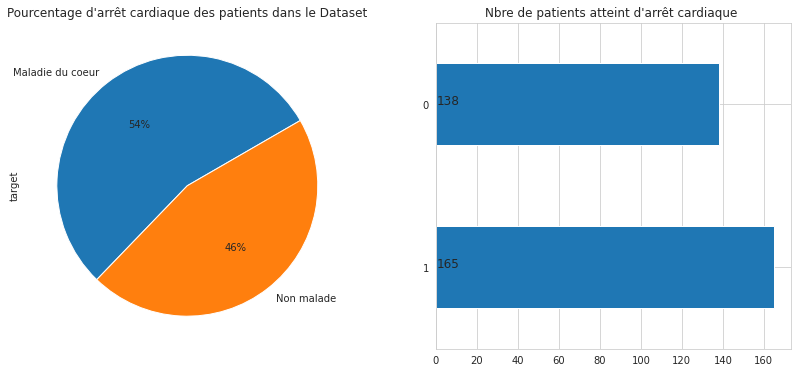

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

#Pie Plot
ax1 = data['target'].value_counts().plot.pie( x="Maladie du coeur" ,y ='Nbre de patients', 
                   autopct = "%1.0f%%",labels=["Maladie du coeur","Non malade"], startangle = 30,ax=ax1);
ax1.set(title = "Pourcentage d'arrêt cardiaque des patients dans le Dataset")

#Countplot
ax2 = data["target"].value_counts().plot(kind="barh" ,ax =ax2)

for i,j in enumerate(data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = "Nbre de patients atteint d'arrêt cardiaque ")
plt.show()

Passons maintenant à la distribution de nos données conditionnée par **l'âge**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


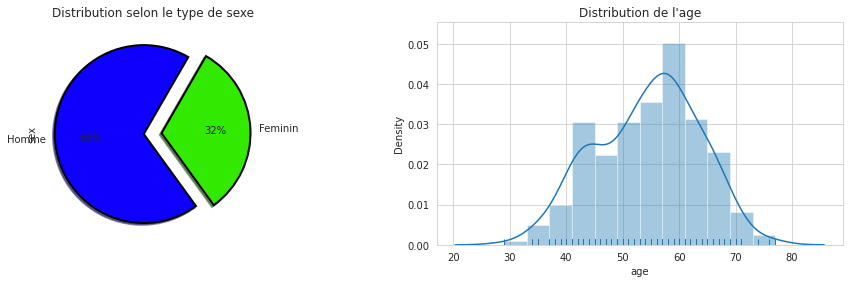

In [30]:
#Pie plot

plt.figure(figsize=(16,9))
plt.subplot(221)
data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Homme","Feminin"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution selon le type de sexe")

#Distribution age

plt.subplot(222)
ax= sns.distplot(data['age'], rug=True)
plt.title("Distribution de l'age")
plt.show()

Comme on peut le constater les **hommes sont plus touchés par les arrêts cardiaques (68%) que les femmes (32%)**, où la moyenne d'âge tourne vers les 60 ans.

Dans ce qui va suivre on s'intéresse à séparer les patients normaux et les patients atteints d'antécendants cardiaques.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


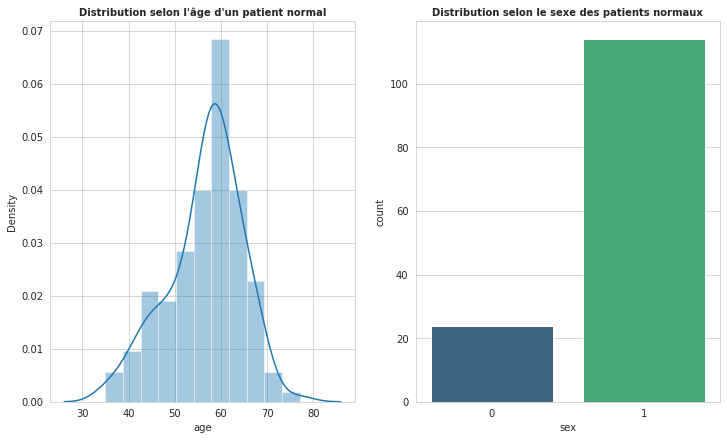

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


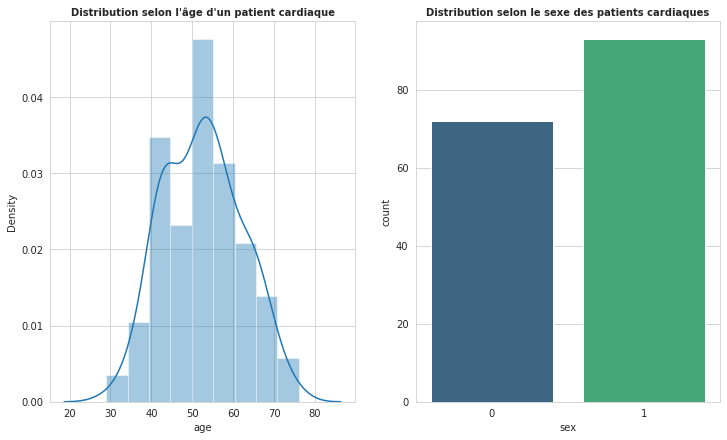

In [31]:
target_1=data[data['target']==1]
target_0=data[data['target']==0]

#Partie Visualisation

#Voyons la distribution selon l'âge des "patients normaux"
fig=plt.figure(figsize=(12,7))

#Cas des patients normaux (target=0)
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(target_0['age'])
plt.title("Distribution selon l'âge d'un patient normal",fontsize=10, weight='bold') 

#Gender distribution pour les "patients normaux"
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_0['sex'],palette='viridis')
plt.title("Distribution selon le sexe des patients normaux",fontsize=10,weight='bold')
plt.show()

#Distribution selon l'âge pour les patients ayant un antecedent cardiaque

fig=plt.figure(figsize=(12,7))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(target_1['age'])
plt.title("Distribution selon l'âge d'un patient cardiaque",fontsize=10, weight='bold') 

#Gender distribution pour les patients cardiaques

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_1['sex'],palette='viridis')
plt.title("Distribution selon le sexe des patients cardiaques",fontsize=10,weight='bold')
plt.show()


Comme susmentionné, la moyenne des décès par arrêt cardiaque est courant chez les 58 a 60 ans. De plus, le nombre de décès est plus observé chez les patients de sexe masculin.

**Voyons maintenant l'impact selon la variable "*Chest pain*" dans le cas de patients normaux et cardiaques.**

In [40]:
def ord_plot(data,ordinal_feat):
    
    taget_0=data[data["target"]==0]
    taget_1=data[data["target"]==1]
        
    fig=plt.figure(figsize=(9,7))

    #Patients normaux
    print(f'----------------------{ordinal_feat}----------------------')
    ax=plt.subplot2grid((1,2),(0,0))
    sns.countplot(target_0[ordinal_feat],palette='viridis')
    plt.title('Effet rest ECG sur les patients normaux',fontsize=10,weight='bold')

    #patients Cardiaques
    print('\n')
    print('\n')
    ax=plt.subplot2grid((1,2),(0,1))
    sns.countplot(target_1[ordinal_feat],palette='viridis')
    plt.title('Effet du rest ECG sur les patients cardiaques',fontsize=10,weight='bold')
    plt.show()
    print("Regardons la différence de la distrubtion des classes plus explictement :")
    print('\n')
    plot_criteria=[ordinal_feat,'target']
    cm=sns.light_palette('red',as_cmap=True)
    ct=(round(pd.crosstab(data[plot_criteria[0]],data[plot_criteria[1]],normalize='columns') * 100,2)).style.background_gradient(cmap = cm)
    return(ct)

In [41]:
#Initialisation de la liste contenant nos ordinal_features
ordinal_feat=['chest_pain_type','rest_ecg','st_slope']

Commeçons par la distribution de **Chest_pain_type**, regardons plus précisément les éléments les plus présents dans le cas de décès.

----------------------chest_pain_type----------------------






/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


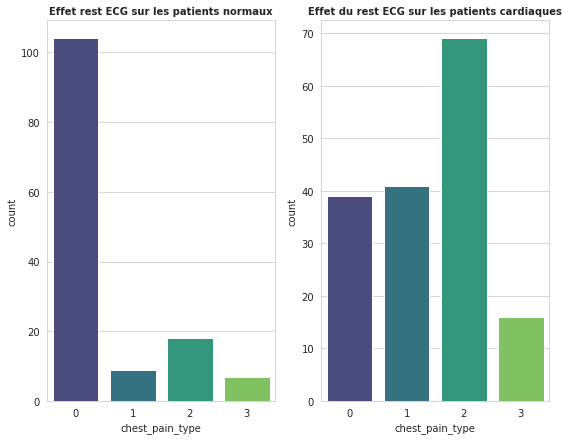

Regardons la différence de la distrubtion des classes plus explictement :




target,0,1
chest_pain_type,,
0,75.360000,23.640000
1,6.520000,24.850000
2,13.040000,41.820000
3,5.070000,9.700000


In [42]:
ord_plot(data,ordinal_feat[0])

Passons au critère **rest_ecg**

----------------------rest_ecg----------------------






/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


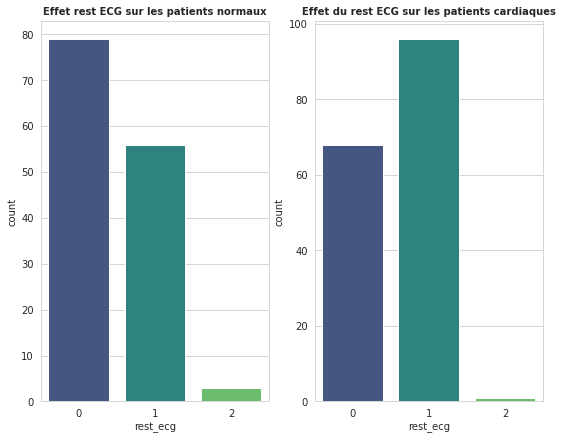

Regardons la différence de la distrubtion des classes plus explictement :




target,0,1
rest_ecg,,
0,57.250000,41.210000
1,40.580000,58.180000
2,2.170000,0.610000


In [43]:
ord_plot(data,ordinal_feat[1])

maitenant regardons **st_slope**

----------------------st_slope----------------------






/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


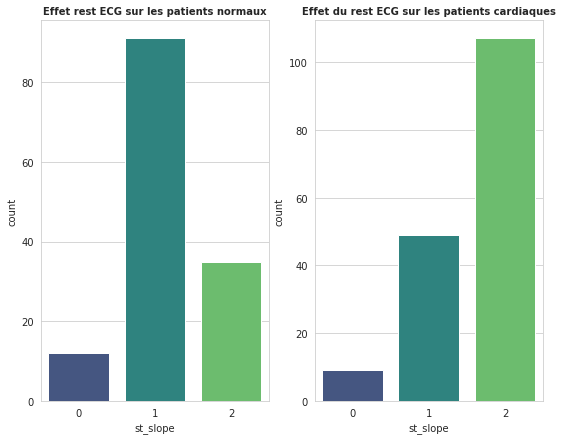

Regardons la différence de la distrubtion des classes plus explictement :




target,0,1
st_slope,,
0,8.700000,5.450000
1,65.940000,29.700000
2,25.360000,64.850000


In [44]:
ord_plot(data,ordinal_feat[2])

**Passant maintenant à la distribution de nos valeurs numériques**

In [45]:
class expl_analysis:
    def __init__(self,data):
        self.dt=data
    
    #Pair_plot selon 'target'
    def pplot(self,num_vars):
        plt.figure(figsize=(9,7))
        sns.pairplot(self.dt,hue='target',vars=num_vars,corner=True)
        
    #Scatter_plot of the distribution selon 'target'
    def scatplot(self,X,Y):
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=X,y=Y,
                        hue='target',data=self.dt)
        
    #Plot pour detecter les outliers
    def outlier_plot(self,numeric_feat):
        plt.figure(figsize=(9,7))
        eda_hd=self.dt.reindex(columns = numeric_feat)
        for i in range(len(eda_hd.columns)):
            plt.subplot(3,3,i+1)
            sns.boxplot(eda_hd[eda_hd.columns[i]])
        plt.show()
        
    #Matrice de corrélation 
    def eda_cor(self,numeric_feat):
        eda_hd=self.dt.reindex(columns = numeric_feat)
        eda_corr=eda_hd.corr()
        plt.figure(figsize=(9,7))
        sns.heatmap(eda_corr,annot=True,cmap='mako')
        plt.title('Matrice de Corrélation')
        plt.show()

Commençons par regarder la distribution de nos numerical features jumelées deux à deux

<Figure size 648x504 with 0 Axes>

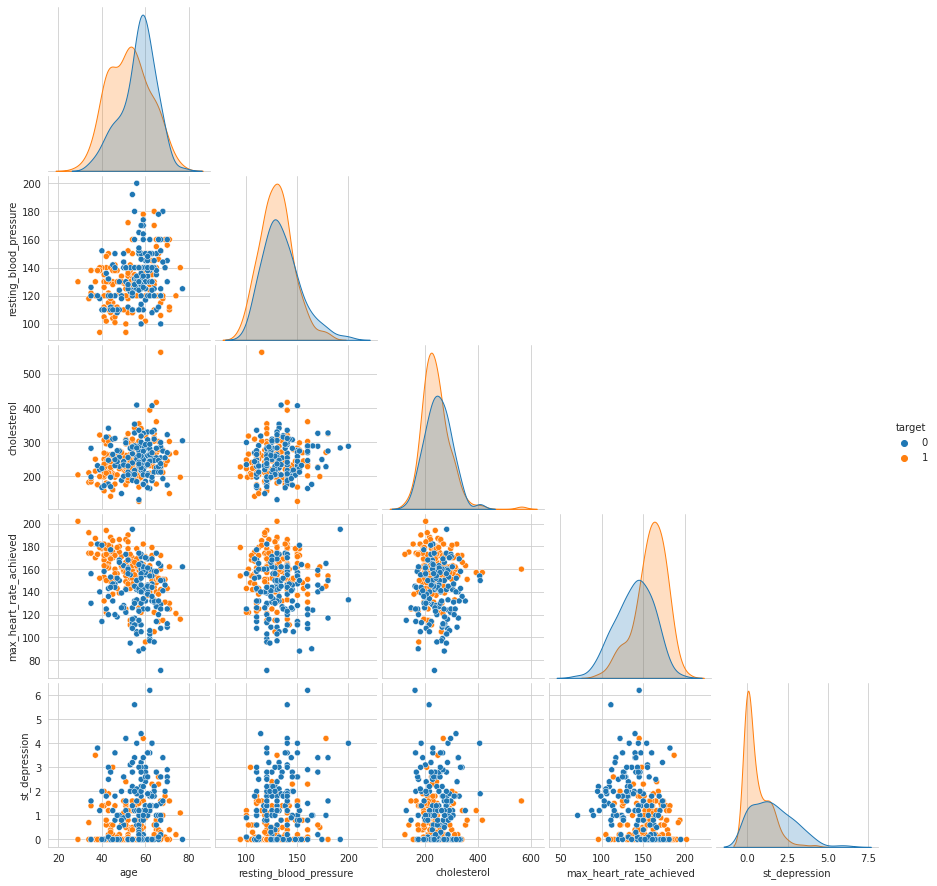

In [46]:
# num_vars=["age","resting_blood_pressure","cholesterol"]
numeric_feat=["age","resting_blood_pressure","cholesterol",
                      "max_heart_rate_achieved","st_depression"]
#Initialisation de la classe
plot_data=expl_analysis(data)

#Pair plot
plot_data.pplot(numeric_feat)

Comme on peut le voir plus l'âge augmente plus nos chances d'avoir un arrêt cardiaque augmente, Regardons plus précisément l'une de nos distributions obtenues plus haut.

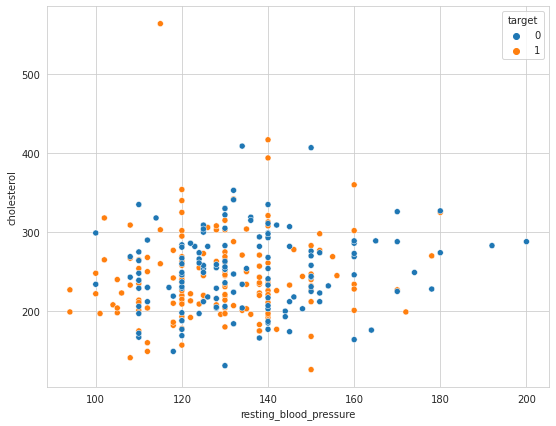

In [47]:
#Relation visuelle entre resting_blood_pressure et cholesterol 
X='resting_blood_pressure'
Y='cholesterol'
plot_data.scatplot(X,Y)

Comme on l'a cité avant on est belle est bien en présence de quelques outliers comme le montre le plot ci-dessus avec des valeurs assez dispersées.

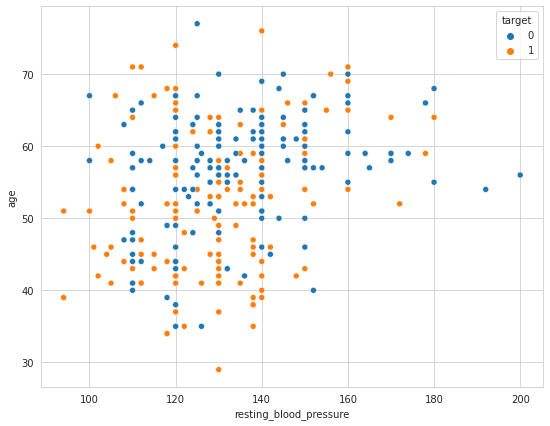

In [48]:
#Relation visuelle entre resting_blood_pressure et cholesterol 
X='resting_blood_pressure'
Y='age'
plot_data.scatplot(X,Y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

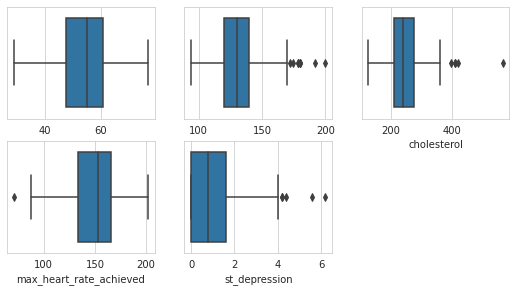

In [49]:
numeric_feat=["age","resting_blood_pressure","cholesterol",
                      "max_heart_rate_achieved","st_depression"]
plot_data.outlier_plot(numeric_feat)

On remarque que notre base de données contient pas mal de outiliers, on verra par la suite une manière de fixer ce problème.

Passons maintenant à la visualisation de la dépendance entre nos variables pour cela on fera appel la matrice de corrélation

Passons maintenant à l'étape de suppression d'outliers, on commence par sélectionner les valeurs de type numériques

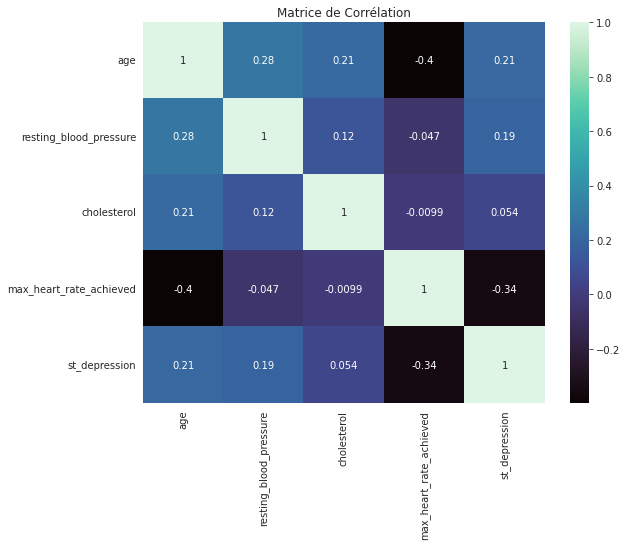

In [50]:
plot_data.eda_cor(numeric_feat)

Passons maintenant à l'étape de suppression d'outliers, on commence par sélectionner les valeurs de type numériques

In [51]:
data_numeric = data[['age','resting_blood_pressure',
                 'cholesterol','max_heart_rate_achieved']]
data_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163


Calculons le z-score donnée  z=(x−u)/σ  par afin d'effacer les outliers.



In [52]:
#model validation
import scipy as sp

z=np.abs(sp.stats.zscore(data_numeric))
print(z[:5])

        age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0  0.952197                0.763956     0.256334                 0.015443
1  1.915313                0.092738     0.072199                 1.633471
2  1.474158                0.092738     0.816773                 0.977514
3  0.180175                0.663867     0.198357                 1.239897
4  0.290464                0.663867     2.082050                 0.583939


Afin de mieux filter nos données on se fixe un seuil à ne pas dépasser pour limiter les dépassements de données

In [53]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  85, 220, 223, 246, 248, 272]), array([2, 2, 2, 1, 2, 1, 3]))


En appliquons les changements on obtient notre base de données nettoyée

In [54]:
data_cl=data[(z<3).all(axis=1)]
print(f"Taille des données avant traitement des outliers : {data.shape}")
print(f"Taille des données après traitement des outliers :{data_cl.shape}")

Taille des données avant traitement des outliers : (303, 14)
Taille des données après traitement des outliers :(296, 14)


A l'aide de la libraire pandas profiling on peut automatiser les étapes effectuer manuellement pour l'exploration de données sous un format report comme suit :

In [62]:
pp.ProfileReport(data)

# **Preparation du modele**

Avant de passer maintenant à l'étape de prédiction commençons par transformer nos données catégoriques en fomat numériques à l'aide de la fonction "**getdummies()**" et séparer nos features de la variable à prédire "**Target**"

In [60]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'nb_vessels', 'thal', 'target'],
      dtype='object')

In [63]:
def onehotencode(df,column_dict):
    df=df.copy()
    for column, prefix in column_dict.items():
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

def preproces(data):
    data=data.copy()
    
    #One hot encode
    nominal_feat=['chest_pain_type','st_slope','thal']
    data=onehotencode(data,dict(zip(nominal_feat,['CP','SL','TH'])))
    
    #Split nos données
    y=data['target'].copy()
    X=data.drop('target',axis=1).copy()
    
    return X,y
    
#Scale X (train et test)
def scaling(data,scaler):
    num_feat=['age','resting_blood_pressure','cholesterol',
              'max_heart_rate_achieved','st_depression']
    data[num_feat] = scaler.fit_transform(data[num_feat])
    return data

In [64]:
X_cl,y_cl=preproces(data_cl)
X_cl.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,1,0


Regardons maintenant la corrélation pour vérifier si une Réduction de dimension sera nécessaire pour le bon développement de notre modèle de prédiction

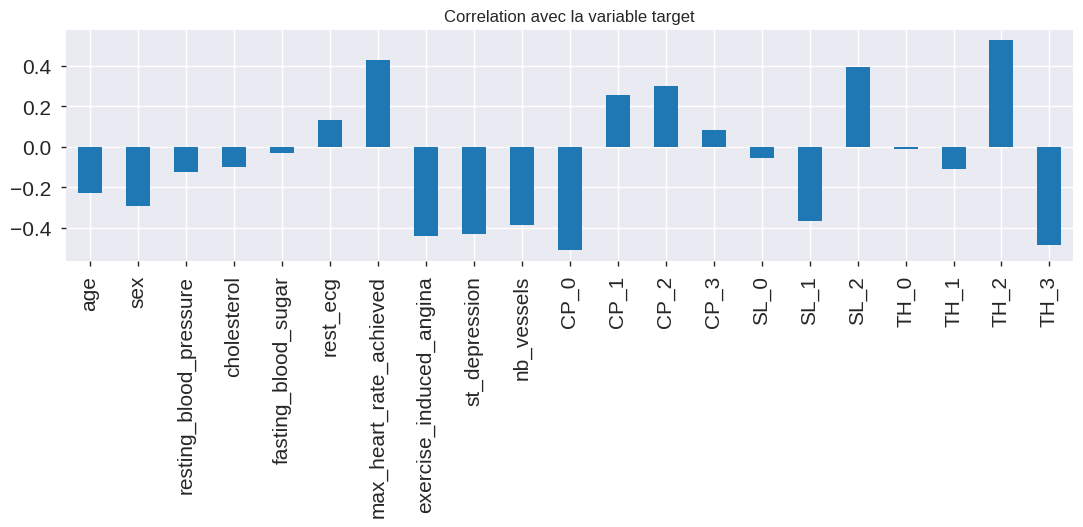

In [65]:
X_cl.corrwith(y_cl).plot.bar(figsize=(13,3),title='Correlation avec la variable target',
                       fontsize = 15,rot = 90, grid = True)

# **Test de train fractionné**

In [66]:
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=0.20, random_state = 0)

In [68]:
print('la distribution de la variable target dans le train est :')
print(y_cl_train.value_counts())

print('la distribution de la variable target dans le test est :')
print(y_cl_test.value_counts())

la distribution de la variable target dans le train est :
1    134
0    102
Name: target, dtype: int64
la distribution de la variable target dans le test est :
0    31
1    29
Name: target, dtype: int64


C'est bon nous sommes loin du cas de déséquilibre on peut maintenant initialiser l'étape de normalisation avant l'étape de classification

In [69]:
X_cl_train.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
137,62,1,128,208,1,0,140,0,0.0,0,...,1,0,0,0,0,1,0,0,1,0
139,64,1,128,263,0,1,105,1,0.2,1,...,0,0,0,0,1,0,0,0,0,1
178,43,1,120,177,0,0,120,1,2.5,0,...,0,0,0,0,1,0,0,0,0,1
221,55,1,140,217,0,1,111,1,5.6,0,...,0,0,0,1,0,0,0,0,0,1
20,59,1,135,234,0,1,161,0,0.5,0,...,0,0,0,0,1,0,0,0,0,1


In [70]:
#Normalisons l'ensemble des donnees d'apprentissage ainsi que le test 
scaler=StandardScaler()
X_cl_train=scaling(X_cl_train,scaler)
X_cl_test=scaling(X_cl_test,scaler)

Voyons le changement que cela apporte sur nos données d'Apprentissage et Test

In [71]:
X_cl_train.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
137,0.825913,1,-0.188753,-0.795752,1,0,-0.415713,0,-0.869515,0,...,1,0,0,0,0,1,0,0,1,0
139,1.048546,1,-0.188753,0.414850,0,1,-1.993016,1,-0.699783,1,...,0,0,0,0,1,0,0,0,0,1
178,-1.289103,1,-0.661386,-1.478091,0,0,-1.317029,1,1.252130,0,...,0,0,0,0,1,0,0,0,0,1
221,0.046696,1,0.520197,-0.597653,0,1,-1.722621,1,3.882970,0,...,0,0,0,1,0,0,0,0,0,1
20,0.491963,1,0.224801,-0.223467,0,1,0.530669,0,-0.445186,0,...,0,0,0,0,1,0,0,0,0,1


In [72]:
X_cl_test.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
234,1.858004,1,-0.070261,1.730632,0,0,-1.817290,0,1.406718,3,...,0,0,0,0,1,0,0,0,1,0
232,0.243908,1,1.762642,1.035148,0,0,-0.287537,1,-0.199048,1,...,0,0,0,0,1,0,0,0,0,1
12,-0.401731,1,-0.070261,0.550416,0,1,0.817285,0,-0.399769,0,...,1,0,0,0,0,1,0,0,1,0
217,1.104759,1,-0.070261,1.899234,1,0,-0.839948,1,0.804556,3,...,0,0,0,0,0,1,0,0,0,1
270,-0.724550,1,-0.681229,0.192136,0,0,-0.330030,0,-0.199048,0,...,0,0,0,0,0,1,0,0,0,1


In [73]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modele Machine Learning**

Ici nous testerons selon différents algorithme le modèle qui prédit au mieux nos classes

Logistic Regression
K-Nearest Neighbour
Random Forest Classifier
Extreme Gradient Boost (XGBoost)
Naive Bayes
Decision Tree
Support Vector Machine
Voyons avant comment la méthode de GridSearch permet de tuner les hyperparamètres de nos modèles de classification

In [74]:
#Choix des para;etres

# Nombre d'arbres dans une forêt aléatoire
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Nombre de fonctionnalités à prendre en compte à chaque division
max_features = ['auto', 'sqrt']

# Nombre maximum de niveaux dans l'arborescence
max_depth = [2,4]

# Nombre minimum d'échantillons requis pour diviser un nœud
min_samples_split = [2, 5]

# Nombre minimal d'échantillons requis à chaque nœud feuille
min_samples_leaf = [1, 2]

# Méthode de sélection des échantillons pour la formation de chaque arbre
bootstrap = [True, False]

# Créer la grille de paramètres
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [75]:
from sklearn.model_selection import GridSearchCV
rf_Model=RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=0, n_jobs = 4)

#Ajustement du modèle sur l'ensemble d'entraînement
rf_Grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [76]:
# Selection des meilleurs parametres and la prediction de notre target

print(rf_Grid.best_estimator_)
print('\n')
print('-'*70)
print('\n')
print(rf_Grid.best_params_)

# Passons à la phase de prédiction

rf_Grid.best_estimator_.fit(X_train,y_train)
y_pred=rf_Grid.best_estimator_.predict(X_test)
print('\n')
print('-'*70)
print('\n')
print(f'{accuracy_score(y_test,y_pred)*100}')

RandomForestClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=80)


----------------------------------------------------------------------


{'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 80}


----------------------------------------------------------------------


85.24590163934425


Pour la prédiction ici on a tenté de stocké toutes les informations qu'on aura besoin d'exploiter sous la forme de class contenant l'ensemble des estimateurs auxquels nous allons faire appel

In [77]:
class classifieur:
    
    """In order to combine to flexibility and speed execution of Scikit learn we implement a class of method whre
     the objective will be to call all the previous step into one unique cell"""
    
    def __init__(self,estimators):
        self.algo=estimators
        self.best_estimateurs={}
    #Fitting the models before the prediction phase
    
    def fit(self,X_train,y_train):
        for estim in self.algo:
            self.algo[estim]['mod'].fit(X_train,y_train)
            pred=self.algo[estim]['mod'].score(X_train,y_train)*100
            self.best_estimateurs[estim]={"score":pred}
    
#     Showing the score related to the training part in order to verify if there's any underfit case 
    def score_train(self):
        for estim in self.algo:
            print(f'------{estim}--------')
            print(f"Le score obtenu pour {estim} sur le train set est : {self.best_estimateurs[estim]['score']}")
    
    
    #Prediction used on the test set for all our models
    def pred(self,X_train,y_train,X_test,y_test):
        pred={}
        for estim in self.algo:
            self.algo[estim]['mod'].fit(X_train,y_train)
            pred[estim]=self.algo[estim]['mod'].predict(X_test)
        return(pred)
    
    #Score lié à la qualité de nos prédiction
    def show_score(self,y_test,pred):
        conf_mat={}
        acc_score={}
        for estim in self.algo:
            print(f"--------------{estim}-------------------")
            conf_mat[estim]=confusion_matrix(y_test,pred[estim])
            acc_score[estim]=accuracy_score(y_test,pred[estim])
            print(f'En faisant appel à la matrice de confusion on a : \n {conf_mat[estim]}')
            print('\n')
            print(f'Le score de précision de {estim} est de :\n {acc_score[estim]*100}')
            print('\n')
            print('On présente le rapport de classification avec toutes les métriques liées au score prédictif')
            print(classification_report(y_test,pred[estim]))
            print(f"*"*40)
            print("\n")
        return(acc_score)
    
    def roc_curve(self,pred):
        plt.figure(figsize=(10,5))
        for estim in pred.keys():
            fpr,tpr,threshold = roc_curve(y_test,pred[estim])
            sns.set_style('whitegrid')
            plt.title('Reciver Operating Characterstic Curve')
            plt.plot(fpr,tpr,label=f'{estim}')
        plt.ylabel('True positive rate')
        plt.xlabel('False positive rate')
        plt.legend()
        plt.show()
        
    def model_eval(self,acc_score):
        accuracy=acc_score.copy()
        accuracy.update((x,y*100) for x,y in acc_score.items())
        models=list(acc_score.keys())
        scores=list(accuracy.values())
        mod_ev=pd.DataFrame({'Model':models,'Accuracy':scores})
        mod_ev
        return(mod_ev)

# Estimators to be called 
estimators={"knn":{'mod':KNeighborsClassifier(),"param":0},
                 "logistique regression":{'mod':LogisticRegression(),'param':0},
                 "xgb":{'mod':XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),'param':0},
           "random forest":{'mod':RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=33),"param":0},
           "extra trees":{'mod':ExtraTreesClassifier(criterion = 'entropy',n_estimators=120, random_state=0,max_depth=7),"param":0},
           "svm":{"mod":SVC(kernel='rbf', C=2),"param":0},
           "decision trees":{"mod":DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6),"param":0},
                 'naive bayes':{"mod":GaussianNB(),"param":0}}

In [78]:
classification=classifieur(estimators)
pred=classification.pred(X_train,y_train,X_test,y_test)
acc_score=classification.show_score(y_test,pred)

--------------knn-------------------
En faisant appel à la matrice de confusion on a : 
 [[21  6]
 [ 5 29]]


Le score de précision de knn est de :
 81.9672131147541


On présente le rapport de classification avec toutes les métriques liées au score prédictif
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

****************************************


--------------logistique regression-------------------
En faisant appel à la matrice de confusion on a : 
 [[21  6]
 [ 3 31]]


Le score de précision de logistique regression est de :
 85.24590163934425


On présente le rapport de classification avec toutes les métriques liées au score prédictif
              precision    recall  f1-score   support

           0      

In [82]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': estimators['xgb']['mod'].feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

AttributeError: ignored

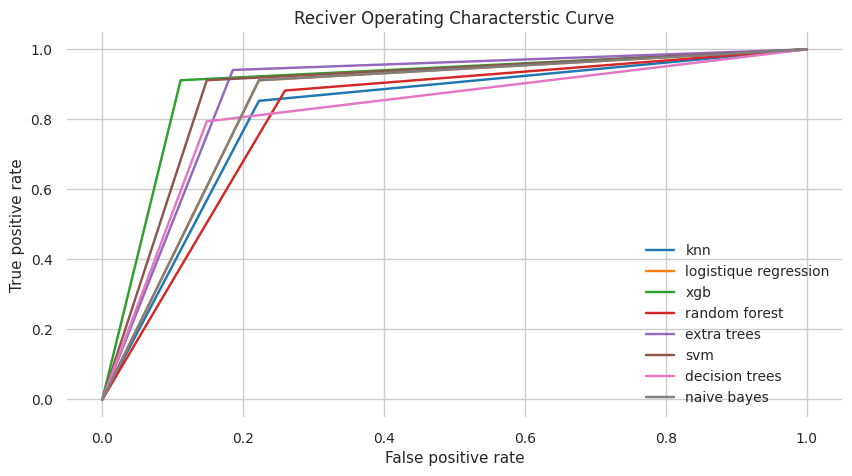

In [80]:
classification.roc_curve(pred)

# **Modele d'evaluation**

Résumons dans ce qui va suivre les résultats prédictifs obtenus

In [83]:
model_ev=classification.model_eval(acc_score)
model_ev

,Model,Accuracy
0,knn,81.967213
1,logistique regression,85.245902
2,xgb,90.163934
3,random forest,81.967213
4,extra trees,88.524590
5,svm,88.524590
6,decision trees,81.967213
7,naive bayes,85.245902


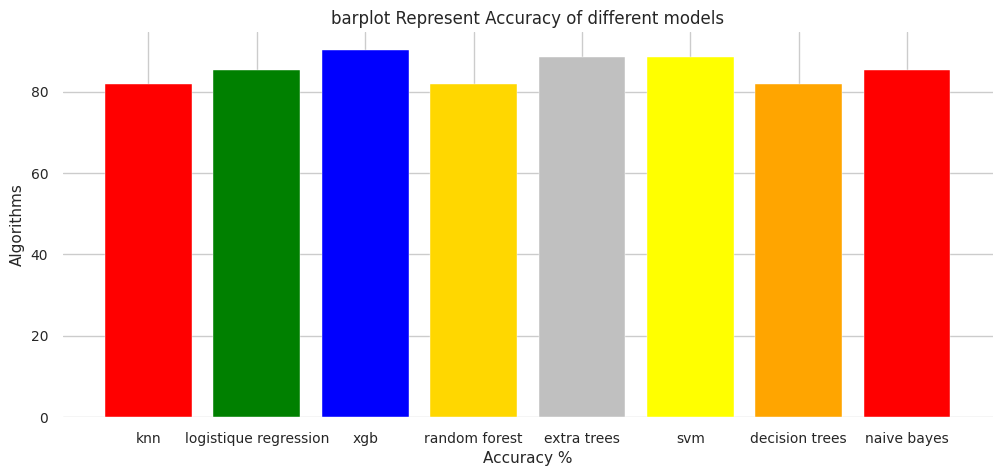

In [84]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Prenons dans ce cas nos trois meilleures modèles de prédiction qui sont :



1.   **Extreme gradient boosting**
2.   **K Nearest Neighbors**
3.   **Support Vector Machines (SVM)**

In [85]:
#Initialisons d'abords nos modèles
knn=estimators['knn']['mod']
xgb=estimators['xgb']['mod']
svc=estimators['svm']['mod']

In [ ]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= knn,random_state=50)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("Matrice de confusion")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

# **Conclusion**

1) Extreme Gradient Boost offre la meilleure précision par rapport aux autres modèles.

2) Angine induite par l'exercice, la douleur thoracique est un symptôme majeur de crise cardiaque.

3) La technique d'assemblage augmente la précision du modèle.